In [36]:
# Import the custom analysis module with forced reload
import importlib
import sys

# Remove from cache if it exists and force reload
if 'leveraged_lp_analysis' in sys.modules:
    del sys.modules['leveraged_lp_analysis']

# Fresh import
from source.leveraged_lp_analysis import LeveragedLPAnalyzer, create_position_config

print(" Module reloaded with breakeven line functionality!")

 Module reloaded with breakeven line functionality!


In [37]:
current_price=5000.0
range_lower=4900.0
range_upper=5100.0
leverage=6
apr=1000.0

--- Leveraged LP Position Analysis ---
Initial Equity: $10,000.00 (2 ETH + $0 USDC)
Leverage: 6x
Total Position Value: $60,000.00
--------------------------------------------------
LP Position at Current Price ($5,000):
  - ETH: 5.940296 ($29,701.48)
  - USDC: $30,298.52
  - Total: $60,000.00
  - Liquidity (L): 42,633.26
--------------------------------------------------
Debt (ETH):
  - Amount: 10.000000 ETH
  - Value: $50,000.00
LP Range: $4,900 - $5,100
--------------------------------------------------
Position Verification at Current Price:
  - LP Value: $60,000.00
  - Final Equity: $10,000.00
  - Expected Equity: $10,000.00
  - ✅ Equity matches expectation
--------------------------------------------------

--- PnL at Key Price Points ---

Lower Band (ETH = $4,900):
  LP Value: $59,101.45
  Final Equity: $10,101.45
  P&L: $101.45 (+1.01%)
  Impermanent Loss: $301.45

Current Price (ETH = $5,000):
  LP Value: $60,000.00
  Final Equity: $10,000.00
  P&L: $-0.00 (-0.00%)
  Impermanen

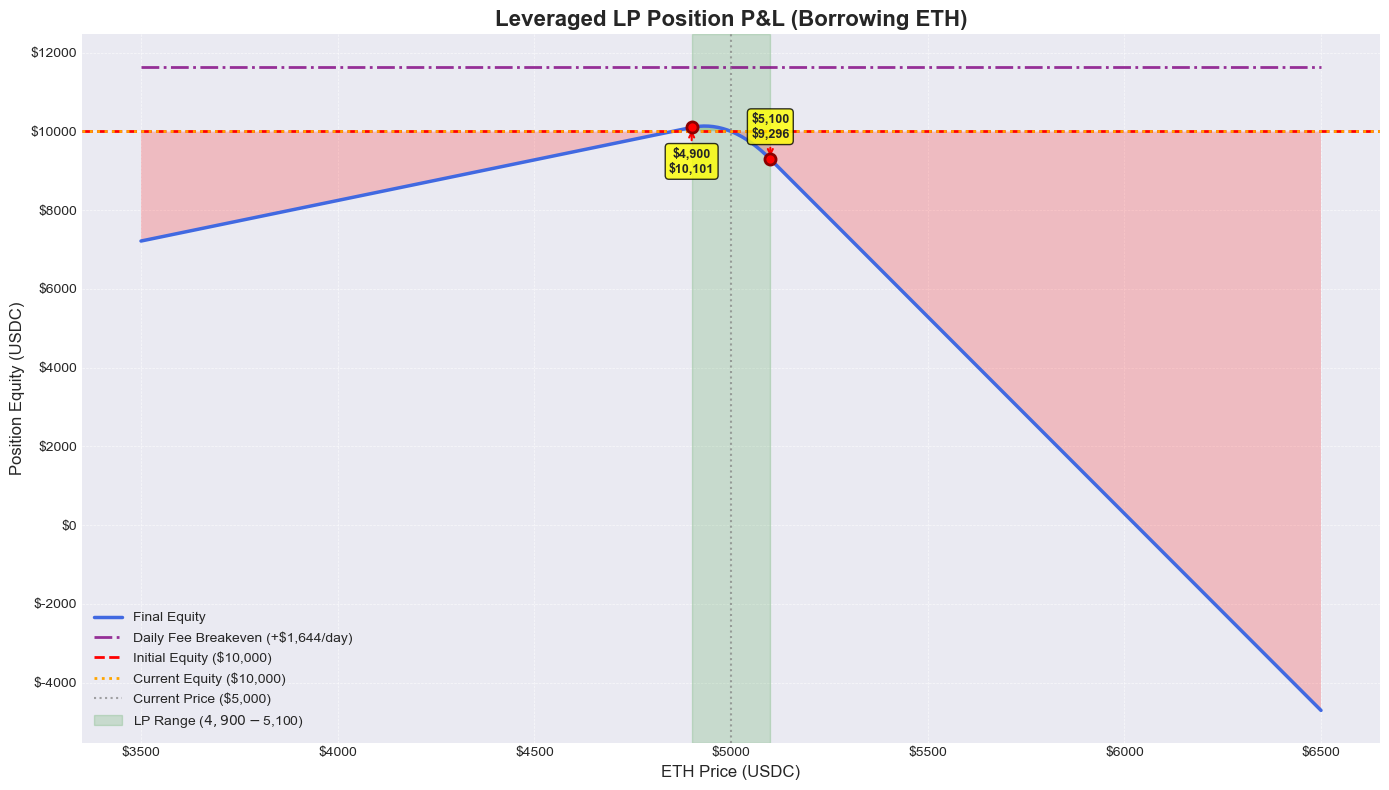

In [38]:
# =============================================================================
# SCENARIO 1: ETH POSITION ANALYSIS
# =============================================================================

# Initialize the analyzer
analyzer = LeveragedLPAnalyzer()

# Configure ETH position parameters
eth_config = create_position_config(
    current_price=current_price,
    range_lower=range_lower,
    range_upper=range_upper,
    initial_eth=2,
    initial_usdc=0,
    leverage=leverage,
    borrow_type='ETH',
    apr_percent=apr
)

# Run analysis and display results
eth_results = analyzer.calculate_position_analysis(eth_config)

if eth_results:
    analyzer.print_analysis_summary(eth_config, eth_results)
    analyzer.plot_individual_position(eth_config, eth_results)

--- Leveraged LP Position Analysis ---
Initial Equity: $5,000.00 (0 ETH + $5000.0 USDC)
Leverage: 6x
Total Position Value: $30,000.00
--------------------------------------------------
LP Position at Current Price ($5,000):
  - ETH: 2.970148 ($14,850.74)
  - USDC: $15,149.26
  - Total: $30,000.00
  - Liquidity (L): 21,316.63
--------------------------------------------------
Debt (USDC):
  - Amount: $25,000.00 USDC
LP Range: $4,900 - $5,100
--------------------------------------------------
Position Verification at Current Price:
  - LP Value: $30,000.00
  - Final Equity: $5,000.00
  - Expected Equity: $5,000.00
  - ✅ Equity matches expectation
--------------------------------------------------

--- PnL at Key Price Points ---

Lower Band (ETH = $4,900):
  LP Value: $29,550.73
  Final Equity: $4,550.73
  P&L: $-449.27 (-8.99%)
  Impermanent Loss: $-449.27

Current Price (ETH = $5,000):
  LP Value: $30,000.00
  Final Equity: $5,000.00
  P&L: $-0.00 (-0.00%)
  Impermanent Loss: $-0.00

U

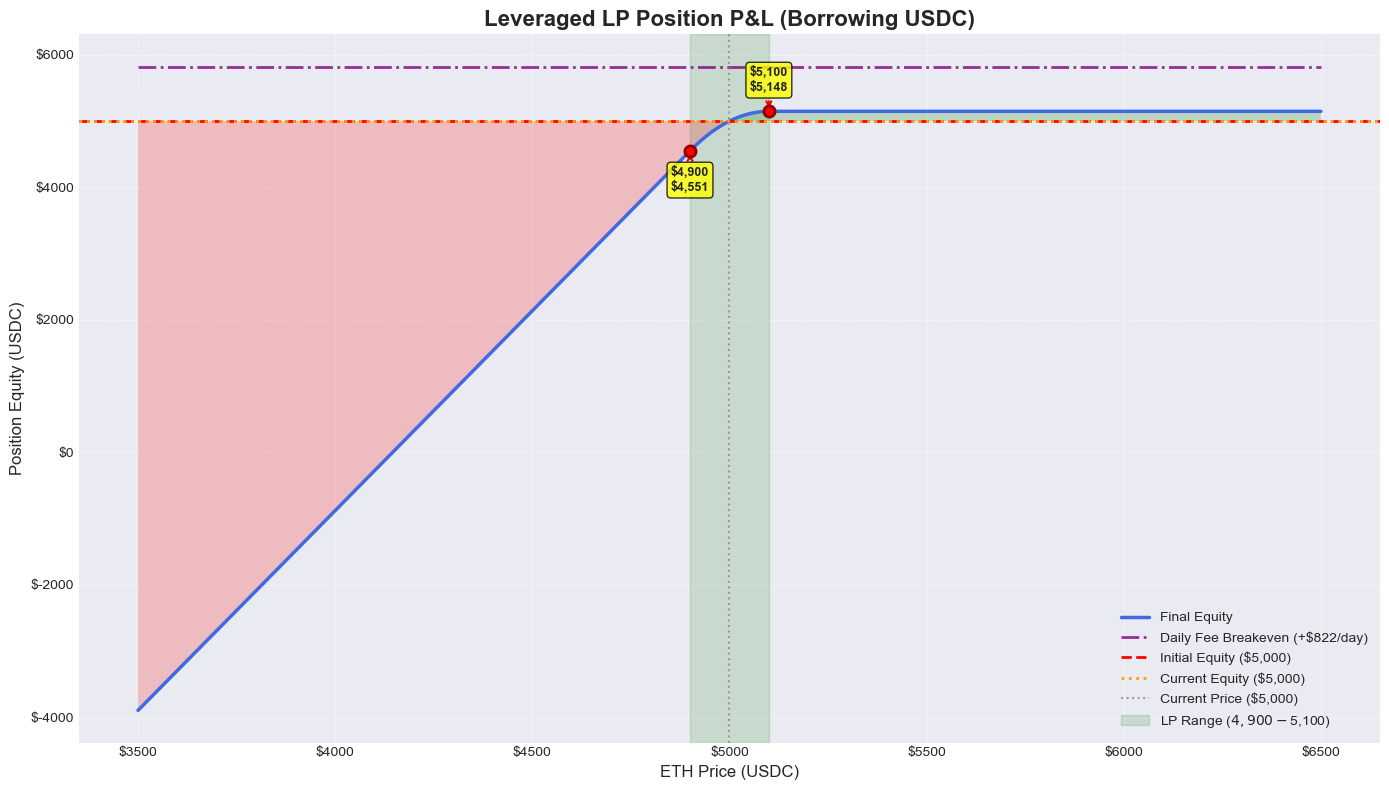

In [39]:
# =============================================================================
# SCENARIO 2: USDC POSITION ANALYSIS
# =============================================================================

# Configure USDC position parameters
usdc_config = create_position_config(
    current_price=current_price,
    range_lower=range_lower,
    range_upper=range_upper,
    initial_eth=0,
    initial_usdc=current_price,
    leverage=leverage,
    borrow_type='USDC',
    apr_percent=apr
)

# Run analysis and display results
usdc_results = analyzer.calculate_position_analysis(usdc_config)

if usdc_results:
    analyzer.print_analysis_summary(usdc_config, usdc_results)
    analyzer.plot_individual_position(usdc_config, usdc_results)

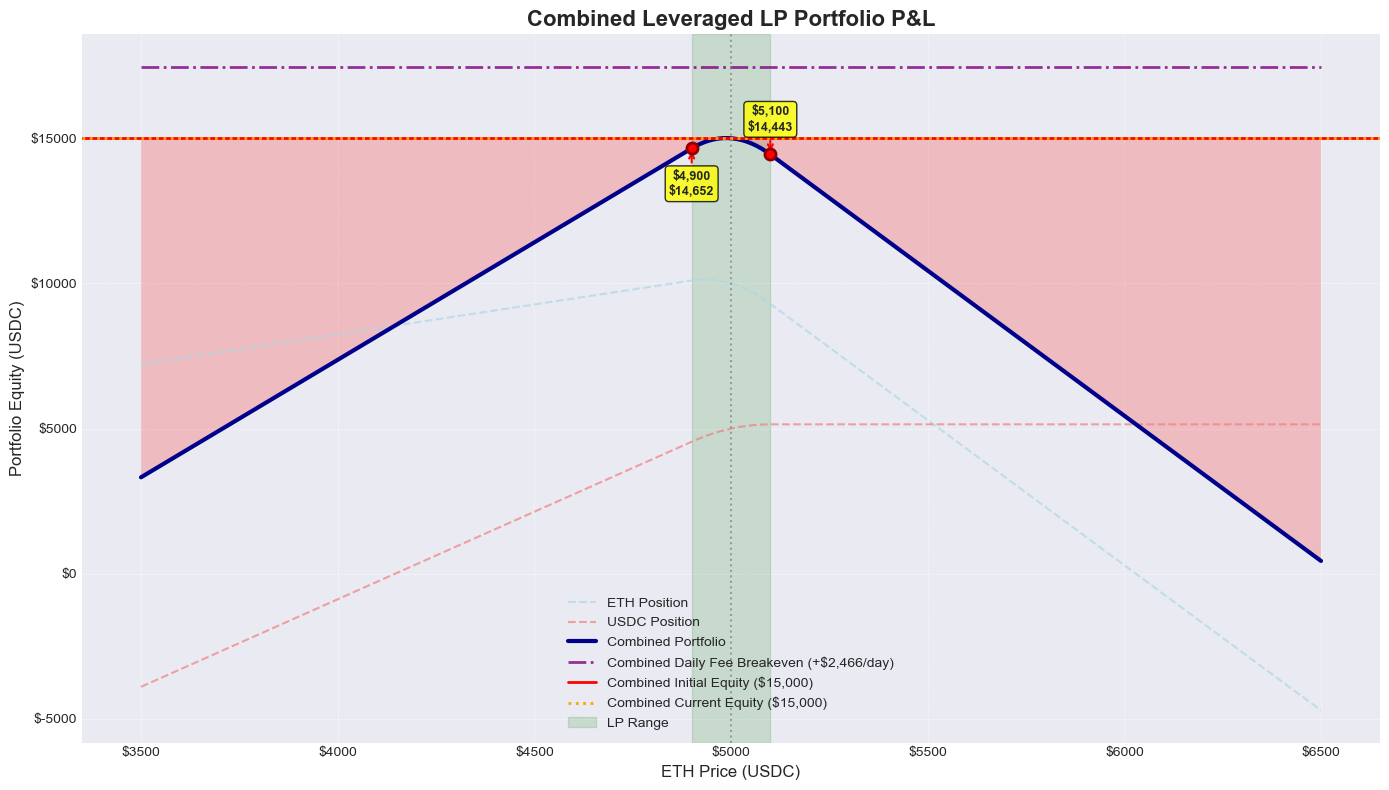

COMBINED PORTFOLIO ANALYSIS
Total Initial Equity: $15,000.00
Total Position Value: $90,000.00
Combined Leverage: 6.0x
------------------------------------------------------------
Position 1: 2 ETH → ETH leverage
Position 2: $5000.0 USDC → USDC leverage
------------------------------------------------------------
Combined Portfolio Scenarios:
  Lower Band   ($4900): $  14,652 ( -2.32%)
  Current      ($5000): $  15,000 ( -0.00%)
  Upper Band   ($5100): $  14,443 ( -3.71%)
  -10%         ($4500): $  11,415 (-23.90%)
  +10%         ($5500): $  10,443 (-30.38%)


In [40]:
# =============================================================================
# SCENARIO 3: COMBINED POSITIONS ANALYSIS
# =============================================================================

# Run combined analysis and visualization
analyzer.plot_combined_positions(eth_config, usdc_config)